In [2]:
# Student Performance
# Check columns to define object of analysis and target.
# 1. personal info
# school, sex, age(15~22), reason, traveltime, freetime, goout, Dalc, Walc, health, absences
# 2. family info
# address, Pstatus, Medu, Fedu, Mjob, Fjob, guardian, famrel
# 
# 3. study info
# studytime, failures, schoolsup, famsup, paid, higher, internet, romantic

# 3. interested viewpoints
# - family
# - reason

# .astype : before transform, select cols first
# 1. to binary
# - school, sex, famsize, adress, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, 
# - make sum or mean each column

# 2. to numeric
# - Mjob, Fjob, guardian
# -----------------------------------------------------------------

In [3]:
# 1-1. Load Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
# 1-2. Check Data
dataDF = pd.read_csv('../DATA/student/student-mat.csv', sep=';')
dataDF.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
dataDF.info()   # 형변환이 필요하다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
dataDF.describe()
# 평균 나이 16.7세, 아버지보다 어머니 학령이 높음. 등 대략적인 수치를 확인

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
# 1-3. 형변환 
dataDF.replace({'yes':1, 'no':0, 'GP':1, 'MS':0, 'F':1, 'M':0, 'U':1, 'R':0, 'LE3':1, 'GT3':0, 'T':1, 'A':0, 'teacher':1, 'health':2, 'services':3, 'at_home':4, 'other':0, 'home':1, 'reputation':2, 'course':3, 'mother':1, 'father':2}, inplace=True)
dataDF.info()
# 정수값으로 데이터 형변환, 정규화는 제외

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [8]:
# encoder로 한 번에 정렬 가능,,
dataDFE = pd.read_csv('../DATA/student/student-mat.csv', sep=';')
encoder = LabelEncoder()
encoder.fit(dataDFE['Fedu'])
dataDFE['Fedu'] = encoder.transform(dataDFE['Fedu'])
np.array(dataDFE.Fedu)
# - 다음부턴 encoder를 쓰자!

array([4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3, 3, 4,
       2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 3, 3, 2, 3, 3, 4, 4, 2, 2, 4, 4, 2,
       2, 3, 3, 3, 2, 4, 2, 2, 2, 4, 3, 1, 3, 4, 2, 2, 4, 1, 2, 3, 3, 3,
       4, 1, 2, 1, 1, 2, 1, 1, 3, 3, 0, 2, 1, 4, 3, 3, 2, 2, 1, 4, 2, 2,
       2, 4, 3, 3, 1, 2, 2, 1, 3, 1, 4, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 4,
       4, 3, 2, 2, 1, 4, 4, 3, 3, 4, 2, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 1,
       2, 4, 4, 4, 4, 3, 1, 4, 3, 2, 4, 1, 1, 1, 2, 2, 4, 1, 1, 1, 3, 2,
       4, 3, 2, 1, 2, 3, 1, 2, 2, 3, 1, 2, 2, 2, 2, 4, 4, 0, 4, 3, 3, 3,
       2, 3, 2, 3, 3, 3, 4, 3, 2, 3, 2, 1, 3, 2, 3, 1, 2, 3, 3, 4, 4, 3,
       4, 4, 3, 3, 1, 2, 2, 4, 1, 3, 1, 3, 3, 4, 2, 2, 4, 2, 3, 3, 3, 2,
       1, 1, 3, 2, 4, 1, 2, 3, 1, 1, 3, 2, 4, 4, 1, 2, 2, 1, 1, 2, 3, 4,
       3, 4, 1, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 1, 2, 3, 3, 2, 3,
       2, 4, 1, 4, 2, 1, 3, 3, 1, 2, 4, 2, 2, 4, 4, 3, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 4, 2, 3, 1, 1, 2, 3, 4, 3, 3, 4, 4,

In [9]:
# 1-4. 컬럼별 상관계수
data_corr = dataDF.corr().abs()
df = pd.DataFrame()
for i in range(len(data_corr.columns)):
    corr_i = data_corr.iloc[:, i].sort_values(ascending=False).reset_index(drop=True)
    df = pd.concat([df, corr_i], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.377610,0.306268,0.377610,0.328096,0.149612,0.149612,0.623455,0.623455,0.206270,0.206270,...,0.150701,0.285019,0.420386,0.647544,0.647544,0.143588,0.175230,0.852118,0.904868,0.904868
2,0.279797,0.274194,0.290485,0.279797,0.112893,0.134937,0.236680,0.250408,0.128340,0.122357,...,0.113397,0.238744,0.285019,0.268171,0.420386,0.097720,0.163752,0.801468,0.852118,0.801468
3,0.242308,0.268171,0.251811,0.216842,0.103425,0.123565,0.217147,0.190270,0.111531,0.106467,...,0.094056,0.209001,0.266994,0.266994,0.274194,0.094056,0.153384,0.354718,0.355896,0.360415
4,0.164967,0.238744,0.243665,0.146722,0.102088,0.108715,0.215527,0.185496,0.086346,0.104542,...,0.077594,0.150701,0.162250,0.209001,0.253785,0.092476,0.136291,0.212607,0.215527,0.217147


In [10]:
df.head().mean().sort_values(ascending=False).head(7)
# G1~3 서로의 상관계수가 높아 평균이 높지만, 그중 G2가 전반적인 상관계수가 높게 나온다

G2          0.665682
G3          0.656780
G1          0.644182
Walc        0.519182
Dalc        0.478342
failures    0.474269
Medu        0.458562
dtype: float64

In [11]:
# 1-5. G2의 상관계수 분석
corr_G2 = dataDF.corr().abs()['G2']
corr_G2.sort_values(ascending=False).head(15)
# - 낙제와 아버지 교육 수준, 상위 교육 희망 정도, 어머니의 교육, 외출 시간 등등이 보인다.
# - 성적 관련이므로 Medu, failures, higher, Fedu, goout, traveltime, studytime, internet, romantic을 피처로 선정한다.

G2            1.000000
G3            0.904868
G1            0.852118
failures      0.355896
Medu          0.215527
higher        0.179129
Fedu          0.164893
goout         0.162250
traveltime    0.153198
age           0.143474
studytime     0.135880
address       0.126037
internet      0.119439
schoolsup     0.117385
romantic      0.111774
Name: G2, dtype: float64

In [12]:
# # 1-6. G2 범주화 ( 0~20을 5등급으로 )
# dataDF['G2'] = pd.cut(dataDF['G2'], labels=[1, 2, 3, 4, 5], bins=[0, 4, 8, 12, 16, 22])
# dataDF.G2.value_counts()

# 상관 관계를 보기 어려워 pass

In [13]:
# 2. 데이터셋 준비
# - failures, Medu, higher, Fedu, goout, traveltime, studytime, internet, romantic
targetSR = dataDF.G2
featureDF = dataDF[[
    #'school',
    #'sex',
    #'age',
    #'address',
    #'famsize',
    #'Pstatus',
    'Medu',
    'Fedu',
    #'Mjob',
    #'Fjob',
    #'reason',
    #'guardian',
    'traveltime',
    'studytime',
    'failures',
    #'schoolsup',
    #'famsup',
    #'paid',
    #'activities',
    #'nursery',
    'higher',
    'internet',
    'romantic',
    #'famrel',
    #'freetime',
    'goout',
    #'Dalc',
    #'Walc',
    #'health',
    #'absences',
    #'G1',
    #'G2',
    #'G3'
]]
featureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Medu        395 non-null    int64
 1   Fedu        395 non-null    int64
 2   traveltime  395 non-null    int64
 3   studytime   395 non-null    int64
 4   failures    395 non-null    int64
 5   higher      395 non-null    int64
 6   internet    395 non-null    int64
 7   romantic    395 non-null    int64
 8   goout       395 non-null    int64
dtypes: int64(9)
memory usage: 27.9 KB


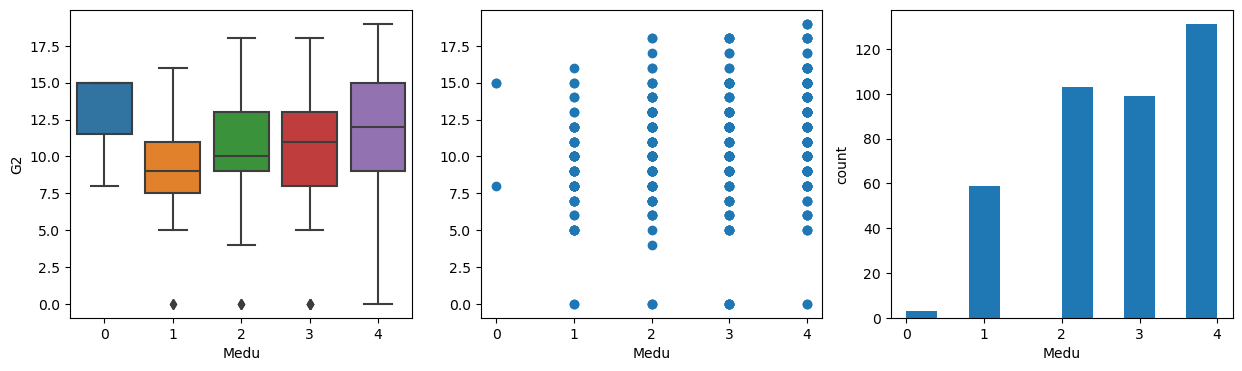

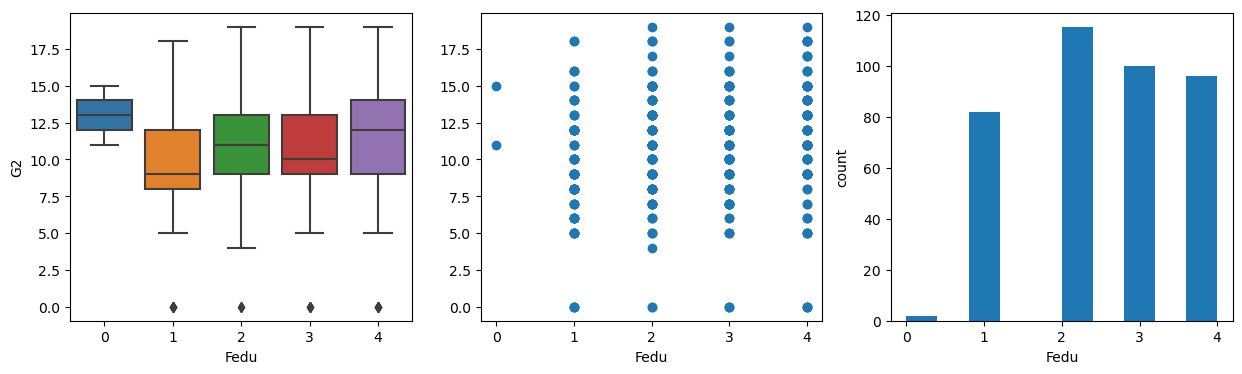

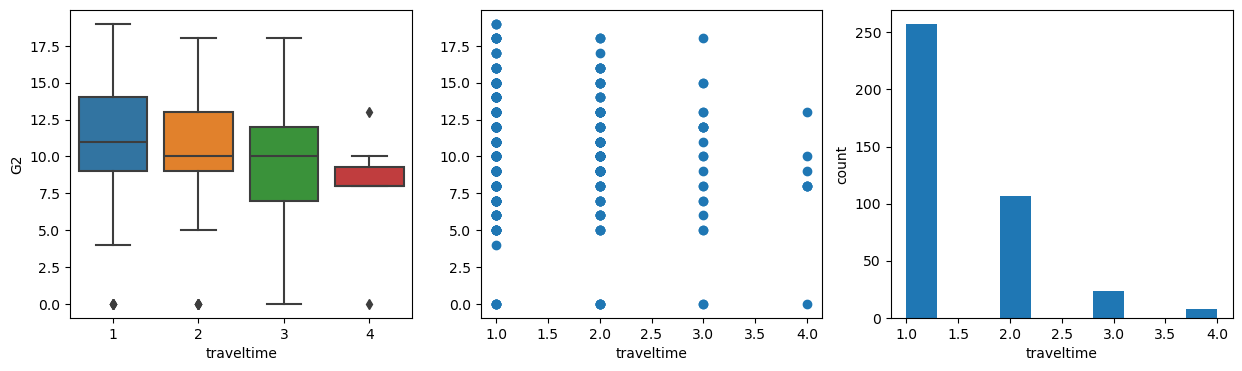

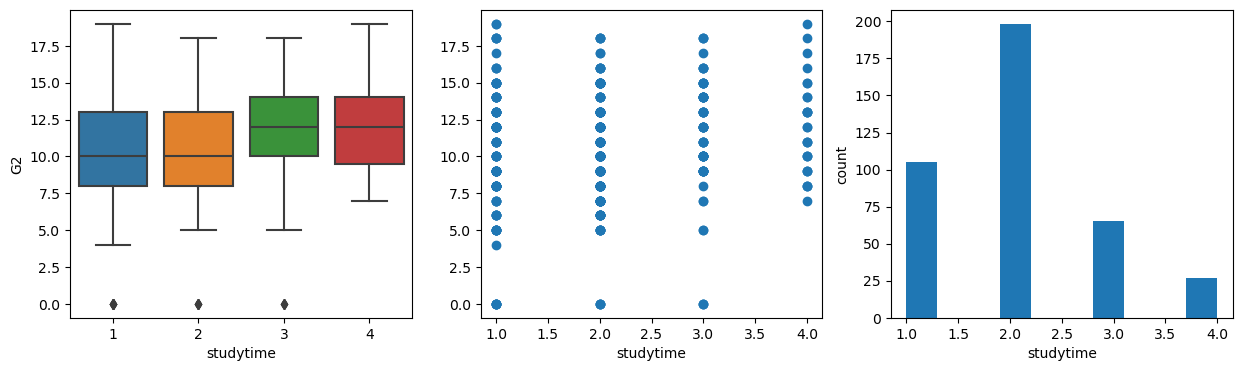

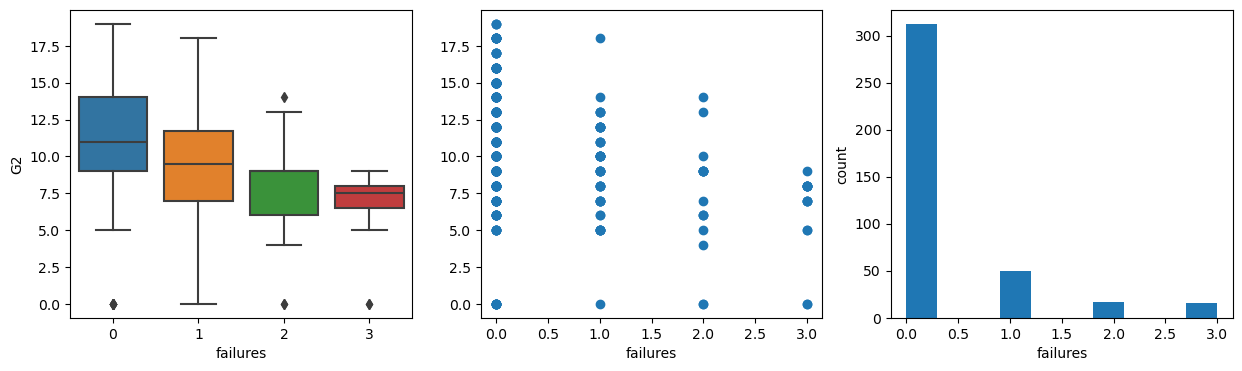

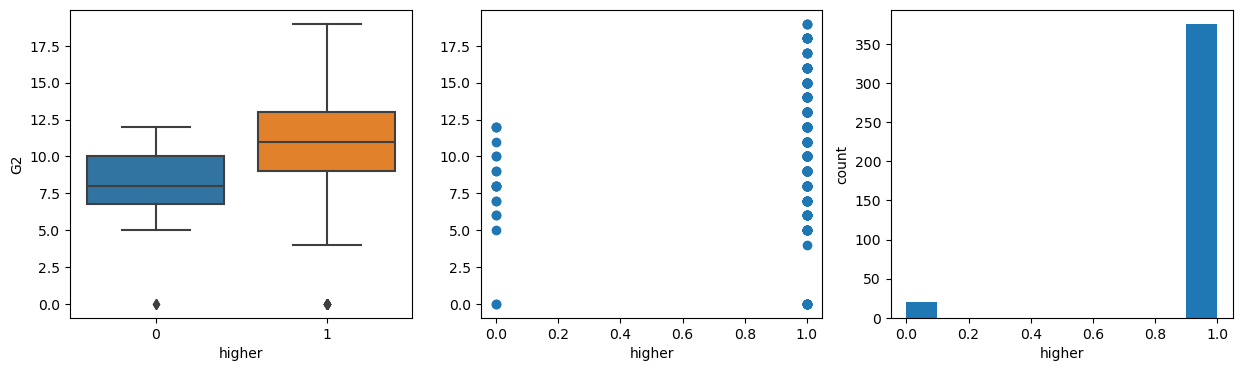

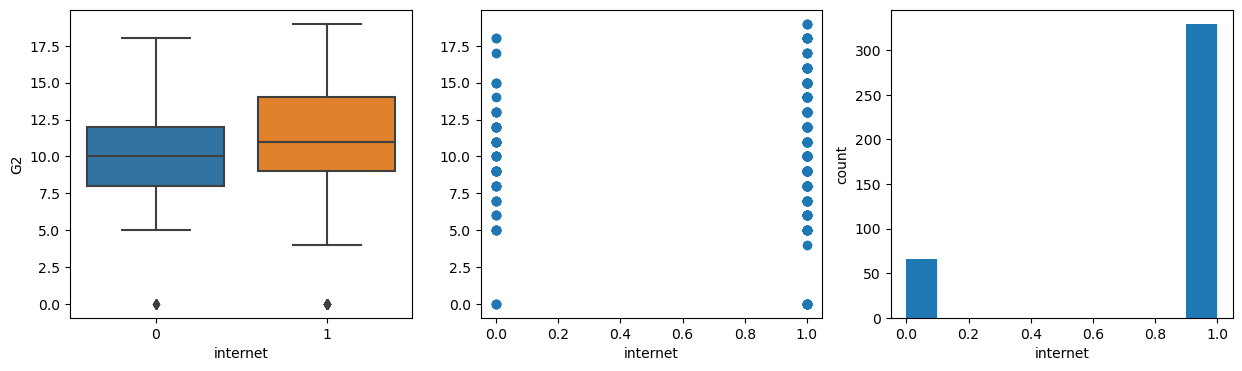

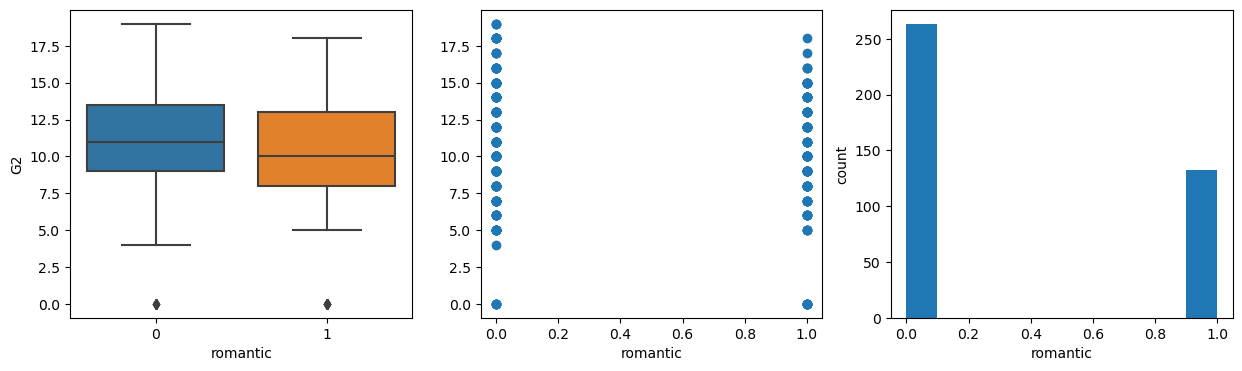

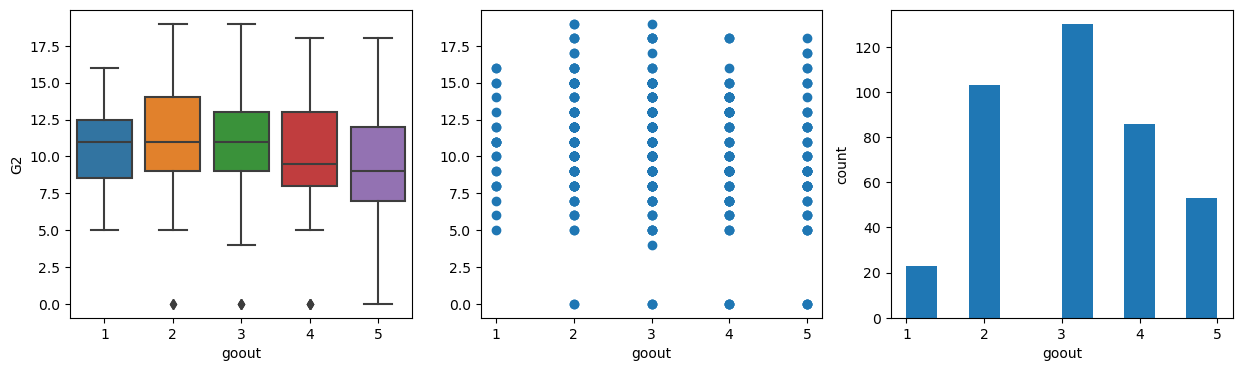

In [14]:
# 2-1. 분류 / 회귀 결정
# - 학습은 지도학습
# - 수치화된 다양한 값이 존재하므로 회귀로 결정
# - 시각화로 회귀 모형 판단

# 타겟과 피처의 각 컬럼 간 관계 시각화
for i in range(len(featureDF.columns)):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=featureDF.iloc[:, i], y=targetSR)
    plt.subplot(1, 3, 2)
    plt.scatter(featureDF.iloc[:, i], targetSR)
    plt.xlabel(featureDF.columns[i])
    plt.subplot(1, 3, 3)
    plt.hist(featureDF.iloc[:, i])
    plt.ylabel('count')
    plt.xlabel(featureDF.columns[i])
    plt.show()

In [16]:
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42)
# 3-1. 모델 구성
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
# 4-1. 모델 평가
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse, model.score(X_test, y_test))

11.334727201565137 0.20396965695577618
